In [1]:
import pandas as pd
import numpy as np

# Read training data
training_file_path = "../Data/train.json"
data = pd.read_json(training_file_path, orient='columns')

# Extract X (ingredients) and y (cuisines)
X = data['ingredients']
y = data['cuisine']

## Data overview

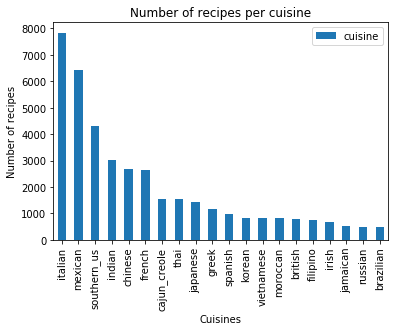

In [3]:
import matplotlib.pyplot as plt

# Count occurence of each cuisine
cuisine_occurences = y.value_counts()

# Plot occurences
cuisine_occurences.plot(kind='bar', x='recipe', y='occurences', legend=True)
plt.title('Number of recipes per cuisine')
plt.xlabel('Cuisines')
plt.ylabel('Number of recipes')
plt.show()

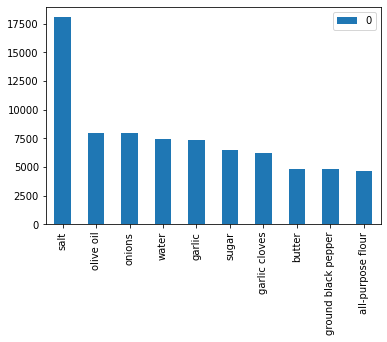

In [4]:
ingredients_list = []

for ingredients in X:
    for ingredient in ingredients:
        ingredients_list.append(ingredient)

ingredients_df = pd.DataFrame(ingredients_list)
ingredient_occurences = ingredients_df[0].value_counts()

ingredient_occurences.head(10).plot(kind='bar', x='ingredient', y='occurences', legend=True)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# Divide the data into a training and a test data set. Ratio = 0.75:0.25
X_train, X_test, y_train, y_test = train_test_split(data[['id','ingredients']], y, stratify=y, train_size=0.7, test_size=0.3)

## Training and test data set

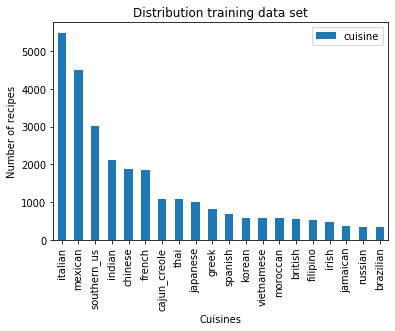

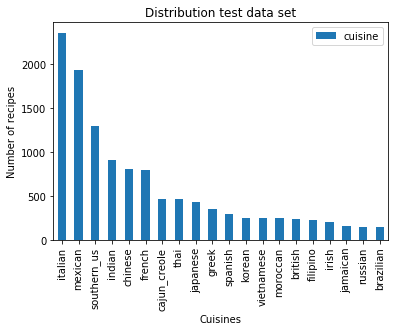

In [6]:
# Count occurence of each cuisine for training set
cuisine_training_occurences = y_train.value_counts()

# Count occurence of each cuisine for test set
cuisine_test_occurences = y_test.value_counts()

# Plot training occurences
cuisine_training_occurences.plot(kind='bar', x='recipe', y='occurences', legend=True)
plt.title('Distribution training data set')
plt.xlabel('Cuisines')
plt.ylabel('Number of recipes')
plt.show()

# Plot test occurences
cuisine_test_occurences.plot(kind='bar', x='recipe', y='occurences', legend=True)
plt.title('Distribution test data set')
plt.xlabel('Cuisines')
plt.ylabel('Number of recipes')
plt.show()

In [7]:
from binary_data import convert_to_binary

# Concat to new dataframe
train_df = pd.concat([y_train, X_train], axis=1)

# Convert to binary and save as csv
convert_to_binary(train_df)

1000
2000
3000
4000
5000
6000
Dropping ingredients column
Writing data to csv
6089
